# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [26]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

import numpy as np
%load_ext autoreload
%autoreload 2
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

par = model.par

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

Edgeworth box will pareto improved allocations can be found below


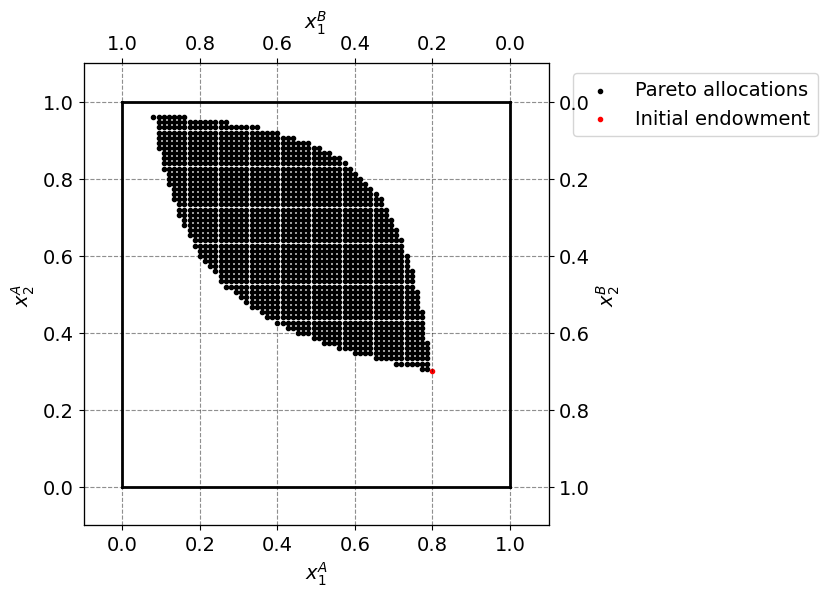

In [27]:
# We create parameters for the total endowment (which is normalised to 1 for both goods)
w1bar = 1.0
w2bar = 1.0

# Define number of steps N:
N = 75
steps = 1 / N

# Use numpy arrange to create pareto efficient allocations (which we call C)
C = [(x1A, x2A) for x1A in np.arange(0, 1 + steps, steps) for x2A in np.arange(0, 1 + steps, steps) for x1B in [1-x1A] for x2B in [1-x2A]
            if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A)
            and model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(par.w1B, par.w2B)]
#print(C)
# Unpacking pareto allocations for person A
x1A_C, x2A_C = zip(*C)

# The figure formats are being set:
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

print('Edgeworth box will pareto improved allocations can be found below')

# The scatterplot is defined
ax_A.scatter(x1A_C, x2A_C,marker='.',color='black',label='Pareto allocations')
ax_A.scatter(par.w1A, par.w2A, marker='.',color='red',label='Initial endowment')

# axis and axis limites are being created:
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

Explain your code and procedure

In [28]:
#First we define price for good 1
P1 = [(0.5 + 2*i/75) for i in range(75)]

#Here we make calculations for errors in market for good 1 and 2
errors = [model.check_market_clearing(x) for x in P1]
eps1 = [x[0] for x in errors]
eps2 = [x[1] for x in errors]

#We import panda to create DataFramce
import pandas as pd

#Here we create DataFrame 
df = pd.DataFrame(errors, columns=['eps1', 'eps2'])
print(df)

        eps1      eps2
0   0.533333 -0.266667
1   0.475949 -0.250667
2   0.424096 -0.234667
3   0.377011 -0.218667
4   0.334066 -0.202667
..       ...       ...
70 -0.360563  0.853333
71 -0.363231  0.869333
72 -0.365840  0.885333
73 -0.368392  0.901333
74 -0.370889  0.917333

[75 rows x 2 columns]


# Question 3

In [29]:
#We print out the results from the exchangeeconomy that that finds p1 that clears market


result = model.find_market_clearing()
print("Optimal p1 value:", result[0])


# We test if demand is correct. Sum of good 1 should equal 1 and same with good 2. 
# Demand for Agent A
demand_x1A, demand_x2A = model.demand_A(p1 = 0.9533333333333334)
print("Demand for good 1 by Agent A:", demand_x1A)
print("Demand for good 2 by Agent A:", demand_x2A)

# Demand for Agent B
demand_x1B, demand_x2B = model.demand_B(p1 = 0.9533333333333334)
print("Demand for good 1 by Agent B:", demand_x1B)
print("Demand for good 2 by Agent B:", demand_x2B)

#Price is seems right. Demand lines up.

Optimal p1 value: 0.9533333333333334
Demand for good 1 by Agent A: 0.37156177156177156
Demand for good 2 by Agent A: 0.7084444444444445
Demand for good 1 by Agent B: 0.6228438228438228
Demand for good 2 by Agent B: 0.2968888888888889


ADD CONCISE CONLUSION.

# Question 4a

In [30]:
print('Question 4a:')
# creating a float with lowest possible utility to be changed in loop
maximum_util_A = float('-inf') 
# creating placeholders for optimal (for A) price and allocation
price = () 
allocation = ()

for x in P1:
    #calculation the allocation for B and then A for price x in P1
    x1B, x2B = model.demand_B(x) 
    x1A = 1 - x1B
    x2A = 1 - x2B
    util_A = model.utility_A(x1A, x2A)

    # When the allocation exists and a greater utility then the previously found maximum utility is found
    #, we update the values for utility, allocation and price
    if x1B <=1 and x2B <= 1 and util_A > maximum_util_A:
            maximum_util_A = util_A
            price = x
            allocation = (x1A, x2A)

print("The maximum utility for A, when they set the price (within P1) is: ", maximum_util_A)
print('This utility is found when the price for product 1 is set to ',price ,'(and p2=1)')
print('This yields the allocation x1A,x2A: ', allocation, 'and x1B,x2B:', (1-allocation[0],1-allocation[1]))



Question 4a:
The maximum utility for A, when they set the price (within P1) is:  0.633615985237553
This utility is found when the price for product 1 is set to  1.8866666666666667 (and p2=1)
This yields the allocation x1A,x2A:  (0.619316843345112, 0.6408888888888888) and x1B,x2B: (0.38068315665488806, 0.35911111111111116)


# Question 4b

In [31]:
#we import optimizing tool, to maximize
from scipy.optimize import minimize_scalar

# as we use a minimizer, we define the negative utility function, to maximize the utility function at price x:
def util_A_to_minimize(x):
    x1B, x2B = model.demand_B(x)
    return -model.utility_A(1-x1B, 1-x2B)

# We minimize the defined negative utility function (the upper bound is found when the demand for x1B is equal to the initial endowment w1B):
optimization = minimize_scalar(util_A_to_minimize, bounds= (0,model.p1_at_xB1_eq_w1B(par.w1B)))

# We unpack the maximum utility and which price for good 1 maximizes the utility
max_utility_A = -optimization.fun
max_price_1 = optimization.x

#printing results:
print('The price which maximizes the utility for A is: ', max_price_1)
print('This yields the following maximum utility: ', max_utility_A)



The price which maximizes the utility for A is:  1.8993462449479623
This yields the following maximum utility:  0.6336208506936608


# Question 5a

In [32]:
# Agent A now chooses his and B's consumption because he is a market maker.
# Here we need to find the optimal allocation for agent A under the following restrictions
# Utility for agent A needs to be weakly bigger than utility for agent A with endowment (w1A = 0.8, w2A = 0.3)
# Utility for agent B needs to be weakly bigger than utility for agent B with endowment (w1B = 0.2, w2B = 0.7)
# Walras equation. Demand for good k for agent i needs to be 1 minus demand for good k for agent j.

from scipy.optimize import minimize

# Utility functions
def utility_B_5b(x):
    x1A, x2A = x
    return (1-x1A)**(2/3) * (1-x2A)**(1/3)

def utility_A_5b(x):
    x1A, x2A = x
    return x1A**(1/3) * x2A**(2/3)

# Constraint function for agent B's utility
def constraint(x):
    return utility_B_5b(x) - model.utility_B(model.par.w1B, model.par.w2B)

# Custom constraint function for values of x1A and x2A so they is the same as C constraint in question 1.
def custom_constraint(x):
    for val in x:
        if val not in [i/75 for i in range(76)]:
            return utility_B_5b(x) - model.utility_B(model.par.w1B, model.par.w2B)
    return 0

# Initial guess
initial_guess = [0.8, 0.8]

# Bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Optimization
result = minimize(lambda x: -utility_A_5b(x), initial_guess, bounds=bounds, constraints=[{'type': 'ineq', 'fun': constraint}, {'type': 'ineq', 'fun': custom_constraint}])

# Maximum utility for agent A
max_utility_A = -result.fun
allocation_A = result.x

# Utility and allocation for agent B
utility_B = utility_B_5b(allocation_A)
allocation_B = [1 - allocation_A[0], 1 - allocation_A[1]]

# Print results
print("Maximum utility for agent A:", max_utility_A)
print("Agent A's allocation:", allocation_A)
print("Utility for agent B:", utility_B)
print("Agent B's allocation:", allocation_B)





Maximum utility for agent A: 0.7432278295181785
Agent A's allocation: [0.5755927  0.84454988]
Utility for agent B: 0.3036585973377191
Agent B's allocation: [0.4244073011668934, 0.15545011644360462]


# Question 5b

In [33]:

# First we find utility of agent B's initial endowment.
utility_B_initial = model.utility_B(model.par.w1B, model.par.w2B)
print("Utility of agent B based on initial endowment:", utility_B_initial)

# Agent B initial utility is 0.3

# Now we define new utility functions for agent B that depends of demand of agent A

from scipy.optimize import minimize

# Utility functions
def utility_B_5b(x):
    x1A, x2A = x
    return (1-x1A)**(2/3) * (1-x2A)**(1/3)

def utility_A_5b(x):
    x1A, x2A = x
    return x1A**(1/3) * x2A**(2/3)

# Constraint function for agent B's utility
def constraint(x):
    return utility_B_5b(x) - model.utility_B(model.par.w1B, model.par.w2B)

# Initial guess
initial_guess = [0.8, 0.8]

# Bounds to ensure that demand is between 0 and 1
bounds = [(0, 1), (0, 1)]

# Optimization of utility of Agent A
result = minimize(lambda x: -utility_A_5b(x), initial_guess, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint})

# Maximum utility for agent A
max_utility_A = -result.fun # Negative because reverse minimization
allocation_A = result.x

# Utility and allocation for agent B
utility_B = utility_B_5b(allocation_A)
allocation_B = [1 - allocation_A[0], 1 - allocation_A[1]]

# Print results
print("Maximum utility for agent A:", max_utility_A)
print("Agent A's allocation:", allocation_A)
print("Utility for agent B:", utility_B)
print("Agent B's allocation:", allocation_B)
print("Notice the answer is the same as in 5a because the lack of restriction in question 5b do not change the allocation")



Utility of agent B based on initial endowment: 0.30365889718756617
Maximum utility for agent A: 0.7432278295162547
Agent A's allocation: [0.5755927  0.84454988]
Utility for agent B: 0.30365859733914574
Agent B's allocation: [0.42440730217142586, 0.15545011570992373]
Notice the answer is the same as in 5a because the lack of restriction in question 5b do not change the allocation


# Question 6

In [34]:
# Question 6a

# Now the allocations is chosen by a social planner, that maximizes utility of A and B together. 
# That is now the maximization problem is no longer only in A's self interest.

from scipy.optimize import minimize
# Define the aggregate utility function to be maximized (negative)
def neg_aggregate_utility(x):
    x1A, x2A = x
    x1B = 1 - x1A
    x2B = 1 - x2A
    return -(model.utility_A(x1A, x2A) + model.utility_B(x1B, x2B))

# Initial guess for the optimization (put as the initial endowments)
start_guess = [model.par.w1A, model.par.w2A]

# Define the constraints (sum of allocations should not exceed total endowments)
constraints = ({'type': 'ineq', 'fun': lambda x: 1 - x[0]},  # 1 - x1A >= 0
               {'type': 'ineq', 'fun': lambda x: 1 - x[1]},  # 1 - x2A >= 0
               {'type': 'ineq', 'fun': lambda x: x[0]},      # x1A >= 0
               {'type': 'ineq', 'fun': lambda x: x[1]})      # x2A >= 0

# Run the solver for the optimization
result = minimize(neg_aggregate_utility, start_guess, constraints=constraints)

# Output the results
if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_x1B = 1 - optimal_x1A
    optimal_x2B = 1 - optimal_x2A
    print(f"Optimal allocation for A: x1A = {optimal_x1A}, x2A = {optimal_x2A}")
    print(f"Optimal allocation for B: x1B = {optimal_x1B}, x2B = {optimal_x2B}")
else:
    print("Optimization failed.")

Optimal allocation for A: x1A = 0.3334399256734374, x2A = 0.6668016053890844
Optimal allocation for B: x1B = 0.6665600743265626, x2B = 0.3331983946109156


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


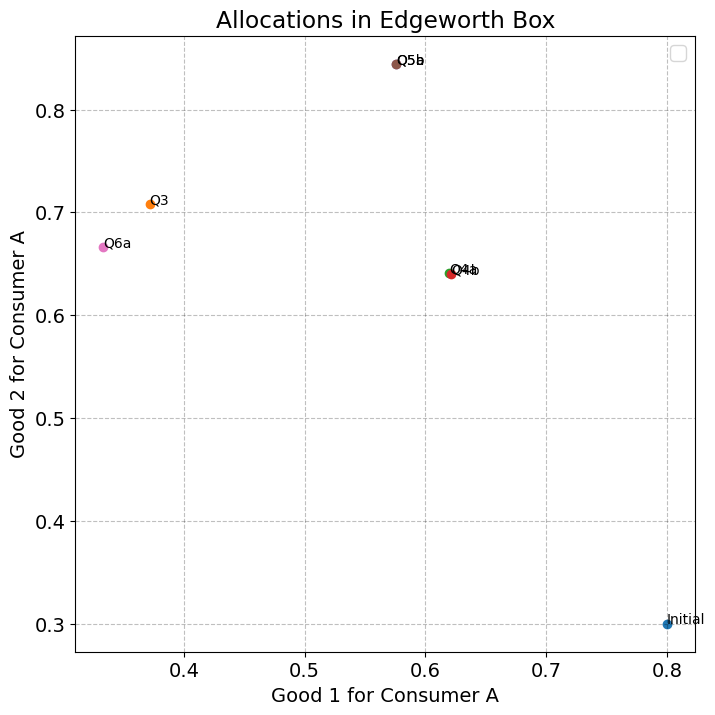

In [35]:
# Question 6b

# Sample allocations
# Format: (x1A, x2A)
allocation_initial_endowment = (0.8, 0.3)
allocation_result_3 = (0.37156177156177156, 0.7084444444444445)
allocation_result_4a = (0.619316843345112, 0.6408888888888888)
allocation_result_4b = (0.6209680912184328, 0.6400435836701358)
allocation_result_5a = (0.5755927,  0.84454988)
allocation_result_5b = (0.5755927,  0.84454988)
allocation_result_6a = (0.3334399256734374, 0.6668016053890844)

allocations = [allocation_initial_endowment, allocation_result_3, allocation_result_4a, allocation_result_4b, allocation_result_5a, allocation_result_5b, allocation_result_6a]
labels = ['Initial', 'Q3', 'Q4a', 'Q4b', 'Q5a', 'Q5b', 'Q6a']

# Plotting
plt.figure(figsize=(8, 8))
for alloc, label in zip(allocations, labels):
    plt.scatter(*alloc)
    plt.text(alloc[0], alloc[1], label, fontsize=10, ha='left')

plt.title('Allocations in Edgeworth Box')
plt.xlabel('Good 1 for Consumer A')
plt.ylabel('Good 2 for Consumer A')
plt.legend()
plt.grid(True)
plt.show()


From the plot we can see the different allocations from question 3, 4a, 4b, 5a, 5b and 6a:
- Blue (Initial) is the initial endowment for agent A
- Orange (Q3) is the result from question 3
- Green (Q4a) and Red (Q4b) is the results from question 4a and 4b
- Brown (Q5a/b) is the result from question 5a and 5b, as we found the same answer in both
- Pink (Q6a) is the result in question 6a

Comments on the different allocations
We see that the different approaches undertaken has led to different results.
The allocations found in question 4a and 4b is the ones closest to the initial endowment. This may imply minimal changes from status quo which can be less troublesome and easier for the consumer to adjust to. It could indicate that there is few gains from trade or that the market is relatively efficient from the start. As it is consumer A that is choosing a price to optimize her own utility, it might not be that there are few gains from trade, but instead that her utility is relatively optimized from the start.
The allocation from Q3 (using the market clearing price) and the allocation in 6a (a utilitarian social planner) is relatively close to each other. This is two allocations that is found by optimizing by other priorities than for just one consumer. In question 6a we have the result a society would look at as the optimal. This is because it is the aggregate utility that is optimized. Therefore society will have the most benefit from this allocation.
For the results in question 5 we see a relatively big change from initial endowment. This is when consumer A choses B's consumption such that B's utility is not worse than for the initial endowment. This doesn't have to improve B's utility, just keep it steady at least, but it could still improve consumer A's utility as she again can optimize and take most of the improvement for herself. 

When looking at the assignment again we could make a graph with utility levels for the different allocations. This will enable us to actual say something about the efficiency of the allocations.

# Question 7

Edgeworth box with random set W, can be found below


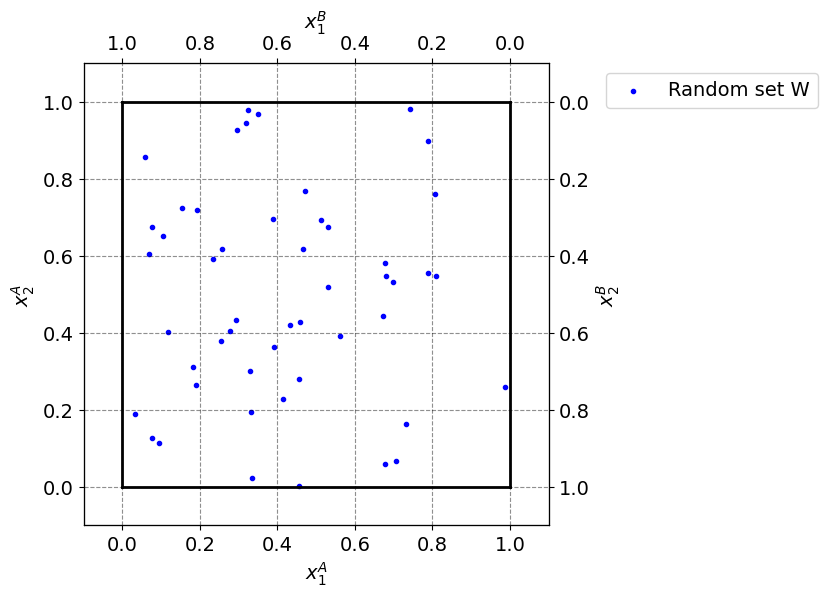

In [36]:
# creating random seed (for replication), lower- & upper bound and number of values in the lists
np.random.seed(69)
lower_bound = 0
upper_bound = 1
Number_of_plots = 50
#randomizing the 50 points 1 and 2 values using bounds and number of plots
w1_A = np.random.uniform(lower_bound, upper_bound, Number_of_plots)
w2_A = np.random.uniform(lower_bound, upper_bound, Number_of_plots)

#creating the egdeworth box and plotting results:
# The figure formats are being set:
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

print('Edgeworth box with random set W, can be found below')

# The scatterplot is defined
ax_A.scatter(w1_A, w2_A,marker='.',color='blue',label='Random set W')

# axis and axis limites are being created:
ax_A.plot([0,upper_bound],[0,0],lw=2,color='black')
ax_A.plot([0,upper_bound],[upper_bound,upper_bound],lw=2,color='black')
ax_A.plot([0,0],[0,upper_bound],lw=2,color='black')
ax_A.plot([upper_bound,upper_bound],[0,upper_bound],lw=2,color='black')

ax_A.set_xlim([-0.1, upper_bound + 0.1])
ax_A.set_ylim([-0.1, upper_bound + 0.1])    
ax_B.set_xlim([upper_bound + 0.1, -0.1])
ax_B.set_ylim([upper_bound + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 8